## CPMSC 448 Homework 2
### Problem 4

#### Name:
#### PSU id:


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 



### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

Statics (min, max, average(mean)) of each features: 

        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
min      0.000000    0.000000       0.000000       0.000000    0.000000   
max     17.000000  199.000000     122.000000      99.000000  846.000000   
mean     3.845052  120.894531      69.105469      20.536458   79.799479   

            BMI  DiabetesPedigreeFunction        Age  
min    0.000000                  0.078000  21.000000  
max   67.100000                  2.420000  81.000000  
mean  31.992578                  0.471876  33.240885   


The histogram of the label (target output): 

 AxesSubplot(0.125,0.125;0.775x0.755)


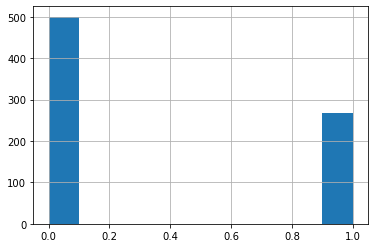

In [2]:
#Add header to data file. 
data = pd.read_csv('Pima.csv',names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "oneTargOutput"])


X = data.drop('oneTargOutput',axis = 1) # identify only featurs as X
y = data.oneTargOutput  #identify only label(target output) as y 


#static of each feature (only: min, max, avg)
statsX = X.describe().loc[['min','max','mean']] 
print ("Statics (min, max, average(mean)) of each features: \n\n ", statsX,"\n\n")


# histogram of the label (target outputs)
hist_y= y.hist() #data.hist(column=["oneTargOutput"])
print ("The histogram of the label (target output): \n\n",hist_y)



### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

5-Fold Cross Validation Scores : 

 [0.6628548580567772, 0.7100359856057576, 0.7018259362921497, 0.723030787684926, 0.7279354924696788, 0.7377582300413168, 0.7328668532586965, 0.7393309342929494, 0.7409969345595095, 0.7540183926429428, 0.7524057043849128, 0.7540183926429428, 0.7458349993336, 0.7556444089031055, 0.7539917366386779] 


max accuracy/score: 

  0.7556444089031055 at k = 14


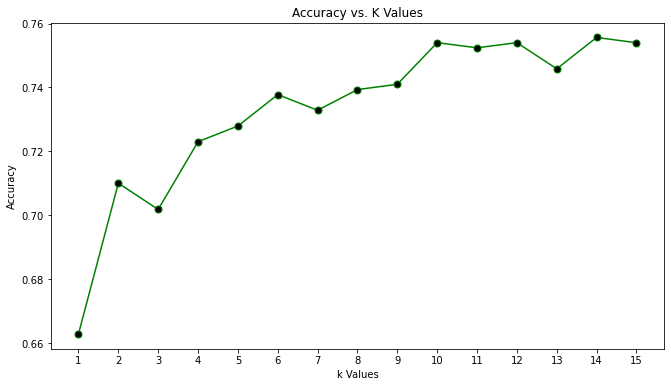

In [3]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) #random_state helps you retain the formatting of the dataset considering each time you split the dataset it is randomly shuffled



# For  𝑘=1,2,3,…,15  compute the 5-fold cross validation error 
cross_val_scores = []
neighbors = list(range(1, 16)) # For neighbors k = 1,2,3,...,15

for i in neighbors: 
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn,X_train, y_train,cv=5) #cv = 5--> 5 fold cross validation on training data.
    cross_val_scores.append(scores.mean()) # 총 15개 나옴, np.mean(scores)

print ("5-Fold Cross Validation Scores : \n\n", cross_val_scores,"\n\n")




# plot the results (with values of  𝑘  on the  𝑥 -axis and accuracy on the  𝑦 -axis) and justify your decision for picking a particular number of neighbors  𝑘 .
k = neighbors[np.argmax(cross_val_scores)]  # best neighbor/k --> using argmax (최대값의 위치) ex. 13th position --> k = 14
print ("max accuracy/score: \n\n ", max(cross_val_scores), "at k =",k)


plt.figure(figsize=(11,6)) #(width, height)
plt.plot(neighbors, cross_val_scores, color = "green", marker = 'o', markerfacecolor = 'black', markersize = 7) 
plt.xticks(np.arange(1,len(neighbors)+1, 1))
plt.title('Accuracy vs. K Values') 
plt.xlabel('k Values') 
plt.ylabel('Accuracy')  
plt.show()



### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [4]:
knn=KNeighborsClassifier(n_neighbors = k) # Create KNN classifier

knn.fit(X_train, y_train) # Fit the classifier to the data

yhat = knn.predict(X_test) # Predict the labels of test data

#Or, directly check accuracy of our model on the test data
Accuracy = (knn.score(X_test,y_test)) #larger score the better fit

print("Test Accuracy : ", Accuracy)
print("Test Error : ", 1-Accuracy)


Test Accuracy :  0.7402597402597403
Test Error :  0.2597402597402597


### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

In [5]:
# Preprocess X_train by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature)
preProc_X = X_train.apply(lambda x: ((x - x.mean()) / x.std()))

#knn on k = 14
knn = KNeighborsClassifier(n_neighbors = k)
scores = cross_val_score(knn, preProc_X, y_train, cv = 5)

print('Accuracy is ', scores.mean(), "at k =", k)
print ("The centralization and standardation affect the accuracy. The accuracy at k = 14 increased")



Accuracy is  0.7638011462081835 at k = 14
The centralization and standardation affect the accuracy. The accuracy at k = 14 increased
